In [4]:
#reading cleaned dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer



In [5]:
csv = 'tables/term_freq_df.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.head()


,negative,positive,total
aa,10,38,48
aaa,0,1,1
aaaa,0,0,0
aaaaa,0,0,0
aaaaaa,0,1,1


Text(0.5, 1.0, 'Top 500 tokens in tweets')

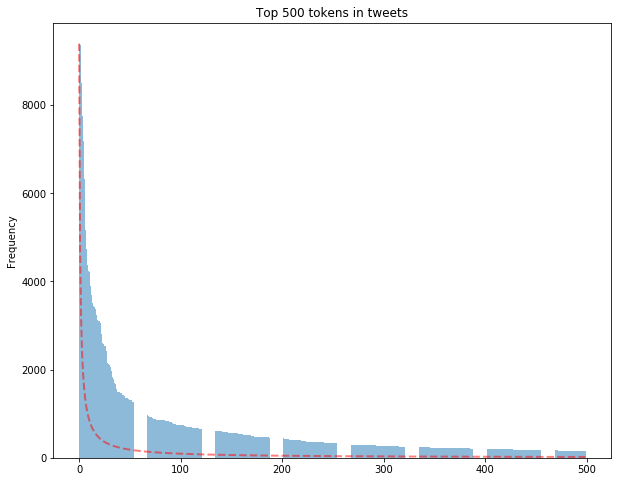

In [6]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

In [7]:
# Tweets Tokens Visualisation

In [8]:
csv = 'tables/clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()
#removing duplicate values
my_df = my_df.drop_duplicates(subset='clean_text', keep='first')

cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.clean_text)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,14,15,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
document_matrix = cvec.transform(my_df.clean_text)

In [10]:
%%time
neg_batches = np.linspace(0,798179,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

88686 entries' term freuquency calculated
177373 entries' term freuquency calculated
266059 entries' term freuquency calculated
354746 entries' term freuquency calculated
443432 entries' term freuquency calculated
532119 entries' term freuquency calculated
620805 entries' term freuquency calculated
709492 entries' term freuquency calculated
798179 entries' term freuquency calculated
CPU times: user 18 s, sys: 22.7 s, total: 40.7 s
Wall time: 44.4 s


In [11]:
%%time
pos_batches = np.linspace(798179,1596019,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

886827 entries' term freuquency calculated
975476 entries' term freuquency calculated
1064125 entries' term freuquency calculated
1152774 entries' term freuquency calculated
1241423 entries' term freuquency calculated
1330072 entries' term freuquency calculated
1418721 entries' term freuquency calculated
1507370 entries' term freuquency calculated
1596019 entries' term freuquency calculated
CPU times: user 16.3 s, sys: 18.7 s, total: 34.9 s
Wall time: 36.1 s


In [12]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
amazon,43682,120697,164379
twitch,157249,1712,158961
twitter,130866,21731,152597
apple,17113,104688,121801
facebook,20516,97996,118512
new,60209,56939,117148
instagram,103754,4872,108626
just,38978,45784,84762
live,67816,13683,81499
aws,78124,833,78957


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

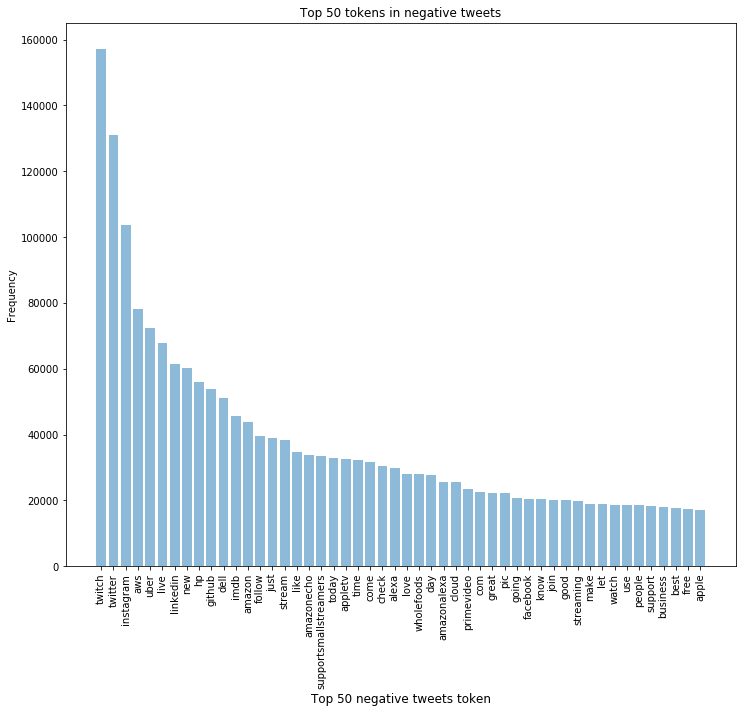

In [14]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tweets token',  fontsize=12)
plt.title('Top 50 tokens in negative tweets', fontsize = 12)

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

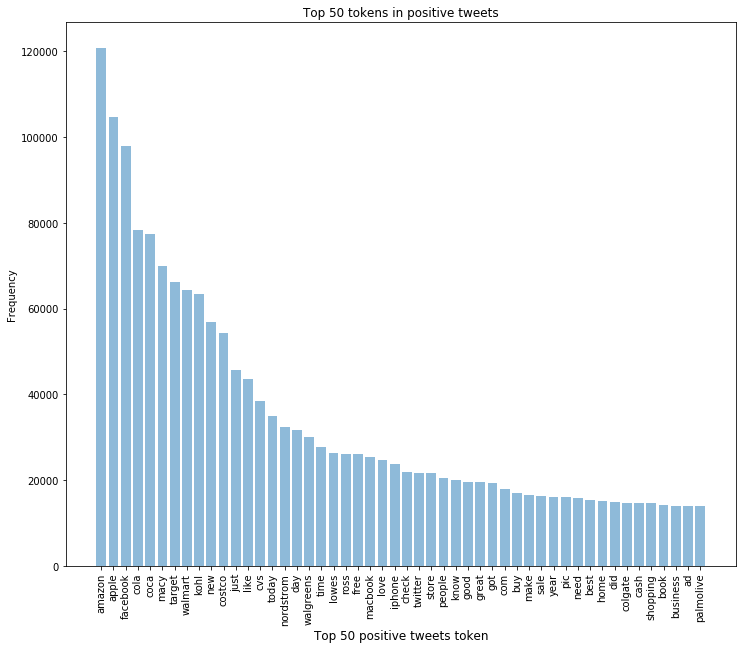

In [15]:
 y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tweets token',  fontsize=12)
plt.title('Top 50 tokens in positive tweets', fontsize = 12)


Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

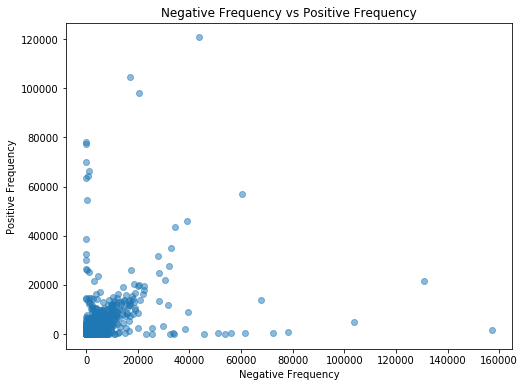

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [17]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
ebayvintage,0,2,2,1.0
eclectics,0,2,2,1.0
cvsdeals,0,608,608,1.0
forthemommas,0,138,138,1.0
jingwatchface,0,10,10,1.0
antiqueclique,0,9,9,1.0
molson,0,15,15,1.0
wonnie,0,449,449,1.0
worksomewhereyoulove,0,878,878,1.0
tunic,0,138,138,1.0


In [18]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
amazon,43682,120697,164379,0.734260,0.014435
apple,17113,104688,121801,0.859500,0.012520
facebook,20516,97996,118512,0.826887,0.011720
cola,34,78250,78284,0.999566,0.009358
coca,28,77312,77340,0.999638,0.009246
macy,19,69962,69981,0.999728,0.008367
target,1060,66215,67275,0.984244,0.007919
walmart,689,64395,65084,0.989414,0.007701
kohl,14,63439,63453,0.999779,0.007587
new,60209,56939,117148,0.486043,0.006810


In [19]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
amazon,43682,120697,164379,0.734260,0.014435,0.028313
apple,17113,104688,121801,0.859500,0.012520,0.024680
facebook,20516,97996,118512,0.826887,0.011720,0.023112
cola,34,78250,78284,0.999566,0.009358,0.018543
coca,28,77312,77340,0.999638,0.009246,0.018323
macy,19,69962,69981,0.999728,0.008367,0.016595
target,1060,66215,67275,0.984244,0.007919,0.015711
walmart,689,64395,65084,0.989414,0.007701,0.015283
kohl,14,63439,63453,0.999779,0.007587,0.015059
new,60209,56939,117148,0.486043,0.006810,0.013431


In [20]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
#term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
#term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf
amazon,43682,120697,164379,0.734260,0.014435,0.028313,0.842247,1.0
apple,17113,104688,121801,0.859500,0.012520,0.024680,0.942703,1.0
facebook,20516,97996,118512,0.826887,0.011720,0.023112,0.923406,1.0
cola,34,78250,78284,0.999566,0.009358,0.018543,0.986790,1.0
coca,28,77312,77340,0.999638,0.009246,0.018323,0.986801,1.0
macy,19,69962,69981,0.999728,0.008367,0.016595,0.986815,1.0
target,1060,66215,67275,0.984244,0.007919,0.015711,0.984212,1.0
walmart,689,64395,65084,0.989414,0.007701,0.015283,0.985126,1.0
kohl,14,63439,63453,0.999779,0.007587,0.015059,0.986823,1.0
new,60209,56939,117148,0.486043,0.006810,0.013431,0.446631,1.0


In [21]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
#term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_rate_normcdf', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf
windowsinsiders,18,0,18,0.0,0.0,0.0,0.009079,0.399004,1.0,2.076848e-06,4.153687e-06,0.990921,0.407608
delltips,369,0,369,0.0,0.0,0.0,0.009079,0.399004,1.0,4.257538e-05,8.514714e-05,0.990921,0.445496
wizebot,356,0,356,0.0,0.0,0.0,0.009079,0.399004,1.0,4.107544e-05,8.214750e-05,0.990921,0.444082
feekifam,400,0,400,0.0,0.0,0.0,0.009079,0.399004,1.0,4.615218e-05,9.230010e-05,0.990921,0.448872
alexafanclub,473,0,473,0.0,0.0,0.0,0.009079,0.399004,1.0,5.457495e-05,1.091439e-04,0.990921,0.456835
hacktoberfest,645,0,645,0.0,0.0,0.0,0.009079,0.399004,1.0,7.442039e-05,1.488297e-04,0.990921,0.475660
hpemsft,3,0,3,0.0,0.0,0.0,0.009079,0.399004,1.0,3.461413e-07,6.922824e-07,0.990921,0.406005
uberrape,407,0,407,0.0,0.0,0.0,0.009079,0.399004,1.0,4.695984e-05,9.391527e-05,0.990921,0.449634
bemorepirate,129,0,129,0.0,0.0,0.0,0.009079,0.399004,1.0,1.488408e-05,2.976771e-05,0.990921,0.419514
lyftdriver,60,0,60,0.0,0.0,0.0,0.009079,0.399004,1.0,6.922827e-06,1.384556e-05,0.990921,0.412104


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

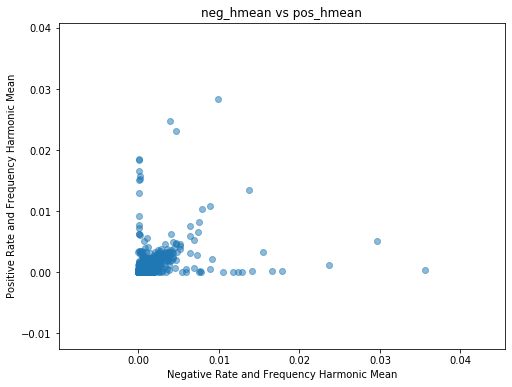

In [22]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

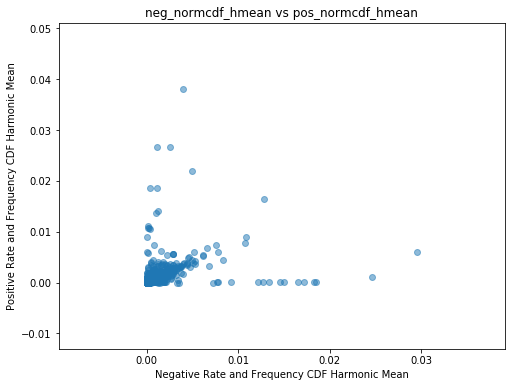

In [30]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')